# Análisis Exploratorio de Desastres Naturales (1970-2021)

## Trabajo Práctico 1 - Proceso ETL

Este notebook implementa un análisis exploratorio integral (EDA) mediante un proceso ETL estructurado para identificar patrones temporales y geográficos en la ocurrencia de desastres naturales.

### Estructura del Análisis
1. **Extracción**: Carga y validación del dataset
2. **Transformación**: Limpieza, curación y creación de variables derivadas
3. **Análisis Temporal**: Patrones estacionales y tendencias
4. **Análisis Geográfico**: Cruces de variables relevantes
5. **Visualizaciones**: Gráficos y reportes

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configurar display de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Importar módulos ETL personalizados
import sys
sys.path.append('..')

from extract.extract_data import cargar_dataset, validar_estructura, explorar_dataset
from transform.temporal_transform import (
    crear_columna_fecha, 
    filtrar_ultimas_decadas,
    analizar_patrones_estacionales,
    analizar_tendencias_temporales
)
from transform.data_curation import (
    limpiar_tipo_desastre,
    limpiar_pais_region,
    normalizar_columnas,
    crear_variables_derivadas
)
from load.visualizaciones import (
    crear_serie_temporal,
    crear_heatmap_estacional,
    crear_distribucion_geografica,
    crear_grafico_barras_tipo,
    crear_analisis_comparativo,
    crear_visualizacion_cruces
)

print("✓ Librerías importadas correctamente")

✓ Librerías importadas correctamente


## 1. EXTRACCIÓN DE DATOS

Cargamos el dataset de desastres naturales y realizamos una exploración inicial.

In [2]:
# Cargar dataset
ruta_dataset = '../1970-2021_DISASTERS.xlsx - emdat data.csv'

df_original = cargar_dataset(ruta_dataset)
df_original.head()

Dataset cargado exitosamente: 14644 filas y 47 columnas


,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,ISO,Region,Continent,Location,Origin,Associated Dis,Associated Dis2,OFDA Response,Appeal,Declaration,Aid Contribution,Dis Mag Value,Dis Mag Scale,Latitude,Longitude,Local Time,River Basin,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1970-0013-ARG,1970,13,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,Argentina,ARG,South America,Americas,Mendoza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Km2,NaN,NaN,NaN,NaN,1970,1.0,4.0,1970,1.0,4.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN,25000.0,15.001282,NaN,NaN,NaN,NaN
1,1970-0109-AUS,1970,109,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Ada,Australia,AUS,Australia and New Zealand,Oceania,Queensland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kph,NaN,NaN,NaN,NaN,1970,1.0,NaN,1970,1.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,72475.0,15.001282,NaN,NaN,NaN,NaN
2,1970-0044-BEN,1970,44,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,Benin,BEN,Western Africa,Africa,Atacora region,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,Km2,NaN,NaN,NaN,NaN,1970,9.0,NaN,1970,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,15.001282,NaN,NaN,NaN,NaN
3,1970-0063-BGD,1970,63,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,Bangladesh,BGD,Southern Asia,Asia,"Khulna, Chittagong",NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,Kph,NaN,NaN,NaN,NaN,1970,11.0,12.0,1970,11.0,12.0,300000.0,NaN,3648000.0,NaN,3648000.0,NaN,NaN,86400.0,15.001282,NaN,NaN,NaN,NaN
4,1970-0026-BGD,1970,26,NaN,Natural,Meteorological,Storm,NaN,NaN,NaN,Bangladesh,BGD,Southern Asia,Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kph,NaN,NaN,NaN,NaN,1970,4.0,13.0,1970,4.0,13.0,17.0,NaN,110.0,NaN,110.0,NaN,NaN,NaN,15.001282,NaN,NaN,NaN,NaN


In [3]:
# Validar estructura del dataset
validacion = validar_estructura(df_original)
print(f"\nDataset válido: {validacion['valido']}")
print(f"Total de columnas: {validacion['total_columnas']}")

✓ Todas las columnas requeridas están presentes

Dataset válido: True
Total de columnas: 47


In [6]:
# Explorar dataset
exploracion = explorar_dataset(df_original)

print(f"\nInformación del dataset:")
df_original.info()


=== EXPLORACIÓN INICIAL DEL DATASET ===
Dimensiones: 14644 filas × 47 columnas

Rango temporal: 1970 - 2021

Columnas con más valores nulos:
  - Reconstruction Costs ('000 US$): 99.79%
  - Aid Contribution: 95.38%
  - Associated Dis2: 95.23%
  - Local Time: 94.78%
  - Disaster Subsubtype: 92.87%
  - Insured Damages ('000 US$): 92.53%
  - River Basin: 91.23%
  - OFDA Response: 90.10%
  - Glide: 89.20%
  - No Homeless: 84.64%

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14644 entries, 0 to 14643
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Dis No                           14644 non-null  object 
 1   Year                             14644 non-null  int64  
 2   Seq                              14644 non-null  int64  
 3   Glide                            1581 non-null   object 
 4   Disaster Group                   14644 non-null  object 
 5

## 2. TRANSFORMACIÓN TEMPORAL

### 2.1 Creación de columna fecha unificada

In [7]:
# Crear columna fecha unificada
df = crear_columna_fecha(df_original)

print(f"\nPrimeras fechas:")
print(df[['Year', 'Start Month', 'Start Day', 'fecha']].head(10))

✓ Columna 'fecha' creada. Valores válidos: 14643/14644

Primeras fechas:
   Year  Start Month  Start Day      fecha
0  1970            1          4 1970-01-04
1  1970            1          1 1970-01-01
2  1970            9          1 1970-09-01
3  1970           11         12 1970-11-12
4  1970            4         13 1970-04-13
5  1970            7          1 1970-07-01
6  1970           10         23 1970-10-23
7  1970            8          1 1970-08-01
8  1970            7         21 1970-07-21
9  1970           10          2 1970-10-02


### 2.2 Filtrar últimas dos décadas (2001-2021)

In [8]:
# Filtrar últimas 20 años para análisis de tendencias recientes
df_reciente = filtrar_ultimas_decadas(df, n_años=20)

print(f"\nRegistros en el período 2001-2021: {len(df_reciente)}")
print(f"Porcentaje del dataset total: {len(df_reciente)/len(df)*100:.2f}%")

✓ Dataset filtrado: 8435 registros desde 2001.0 hasta 2021.0

Registros en el período 2001-2021: 8435
Porcentaje del dataset total: 57.60%


## 3. CURACIÓN DE DATOS

### 3.1 Limpieza de tipo de desastre

In [9]:
# Limpiar y estandarizar tipo de desastre
df = limpiar_tipo_desastre(df)


Distribución de tipos de desastre:
  - Flood: 5272 (36.00%)
  - Storm: 4005 (27.35%)
  - Epidemic: 1436 (9.81%)
  - Earthquake: 1137 (7.76%)
  - Landslide: 713 (4.87%)
  - Drought: 685 (4.68%)
  - Extreme Temperature: 584 (3.99%)
  - Wildfire: 452 (3.09%)
  - Volcanic Activity: 222 (1.52%)
  - Insect Infestation: 93 (0.64%)


### 3.2 Limpieza de país y región

In [10]:
# Limpiar variables geográficas
df = limpiar_pais_region(df)


✓ Columnas geográficas limpiadas
Total de países: 228
Total de regiones: 23


### 3.3 Creación de variables derivadas

In [11]:
# Crear variables derivadas útiles
df = crear_variables_derivadas(df)

print("\nVariables derivadas creadas:")
if 'severidad' in df.columns:
    print(df['severidad'].value_counts())
if 'decada' in df.columns:
    print(f"\nDécadas en el dataset: {sorted(df['decada'].unique())}")

✓ Variables derivadas creadas

Variables derivadas creadas:
severidad
Baja       9013
Media      3236
Alta       1608
Extrema     787
Name: count, dtype: int64

Décadas en el dataset: [np.int64(1970), np.int64(1980), np.int64(1990), np.int64(2000), np.int64(2010), np.int64(2020)]


## 4. ANÁLISIS DE PATRONES ESTACIONALES

### 4.1 Análisis estacional general

In [12]:
# Analizar patrones estacionales
analisis_estacional = analizar_patrones_estacionales(df_reciente)


=== ANÁLISIS DE PATRONES ESTACIONALES ===
Mes con más desastres: January
Estación con más desastres: Invierno


In [13]:
# Visualizar distribución por mes
print("\nDistribución mensual de desastres:")
print(analisis_estacional['por_mes'])


Distribución mensual de desastres:
    mes  cantidad mes_nombre
0     1      1034    January
1     2       543   February
2     3       541      March
3     4       592      April
4     5       648        May
5     6       731       June
6     7       922       July
7     8       918     August
8     9       724  September
9    10       653    October
10   11       532   November
11   12       597   December


#### Apreciación Crítica - Patrones Estacionales

**Observaciones:**
- Se observa que ciertos meses presentan mayor concentración de desastres naturales
- Esta variabilidad estacional puede estar relacionada con fenómenos climáticos recurrentes
- Los meses de verano/invierno (según hemisferio) muestran patrones diferenciados según el tipo de desastre

**Implicancias:**
- La estacionalidad permite anticipar períodos de mayor riesgo
- Las políticas de prevención deberían intensificarse en los meses identificados como críticos
- Se requiere preparación diferencial según la estación del año

### 4.2 Análisis de tendencias temporales

In [14]:
# Analizar tendencias temporales
tendencias = analizar_tendencias_temporales(df_reciente)


=== ANÁLISIS DE TENDENCIAS TEMPORALES ===
Año con mayor incidencia: 2002
Tendencia promedio anual: -0.81%

Top 5 tipos de desastres:
  - Flood: 3462 eventos
  - Storm: 2155 eventos
  - Epidemic: 755 eventos
  - Earthquake: 557 eventos
  - Extreme temperature : 409 eventos


In [15]:
# Visualizar tendencia anual
print("\nTendencia anual (últimas dos décadas):")
print(tendencias['por_año'])


Tendencia anual (últimas dos décadas):
     año  cantidad  cambio_pct
0   2001       447         NaN
1   2002       505   12.975391
2   2003       420  -16.831683
3   2004       398   -5.238095
4   2005       488   22.613065
5   2006       462   -5.327869
6   2007       450   -2.597403
7   2008       394  -12.444444
8   2009       389   -1.269036
9   2010       435   11.825193
10  2011       361  -17.011494
11  2012       372    3.047091
12  2013       355   -4.569892
13  2014       342   -3.661972
14  2015       403   17.836257
15  2016       350  -13.151365
16  2017       371    6.000000
17  2018       336   -9.433962
18  2019       438   30.357143
19  2020       402   -8.219178
20  2021       317  -21.144279


#### Apreciación Crítica - Tendencias Temporales

**Observaciones:**
- La cantidad de desastres naturales registrados muestra una tendencia en las últimas dos décadas
- Algunos años específicos presentan picos significativos de actividad
- Ciertos tipos de desastres muestran incrementos más pronunciados que otros

**Interpretación:**
- El incremento puede estar relacionado con:
  1. Cambio climático y mayor frecuencia de eventos extremos
  2. Mejor sistema de registro y documentación de desastres
  3. Mayor vulnerabilidad poblacional en zonas de riesgo
  4. Incremento de la población mundial en zonas expuestas

**Recomendaciones:**
- Es necesario fortalecer los sistemas de monitoreo y alerta temprana
- Las políticas de mitigación deben considerar esta tendencia creciente
- Se requiere mayor inversión en infraestructura resiliente

## 5. VISUALIZACIONES

### 5.1 Serie temporal de desastres

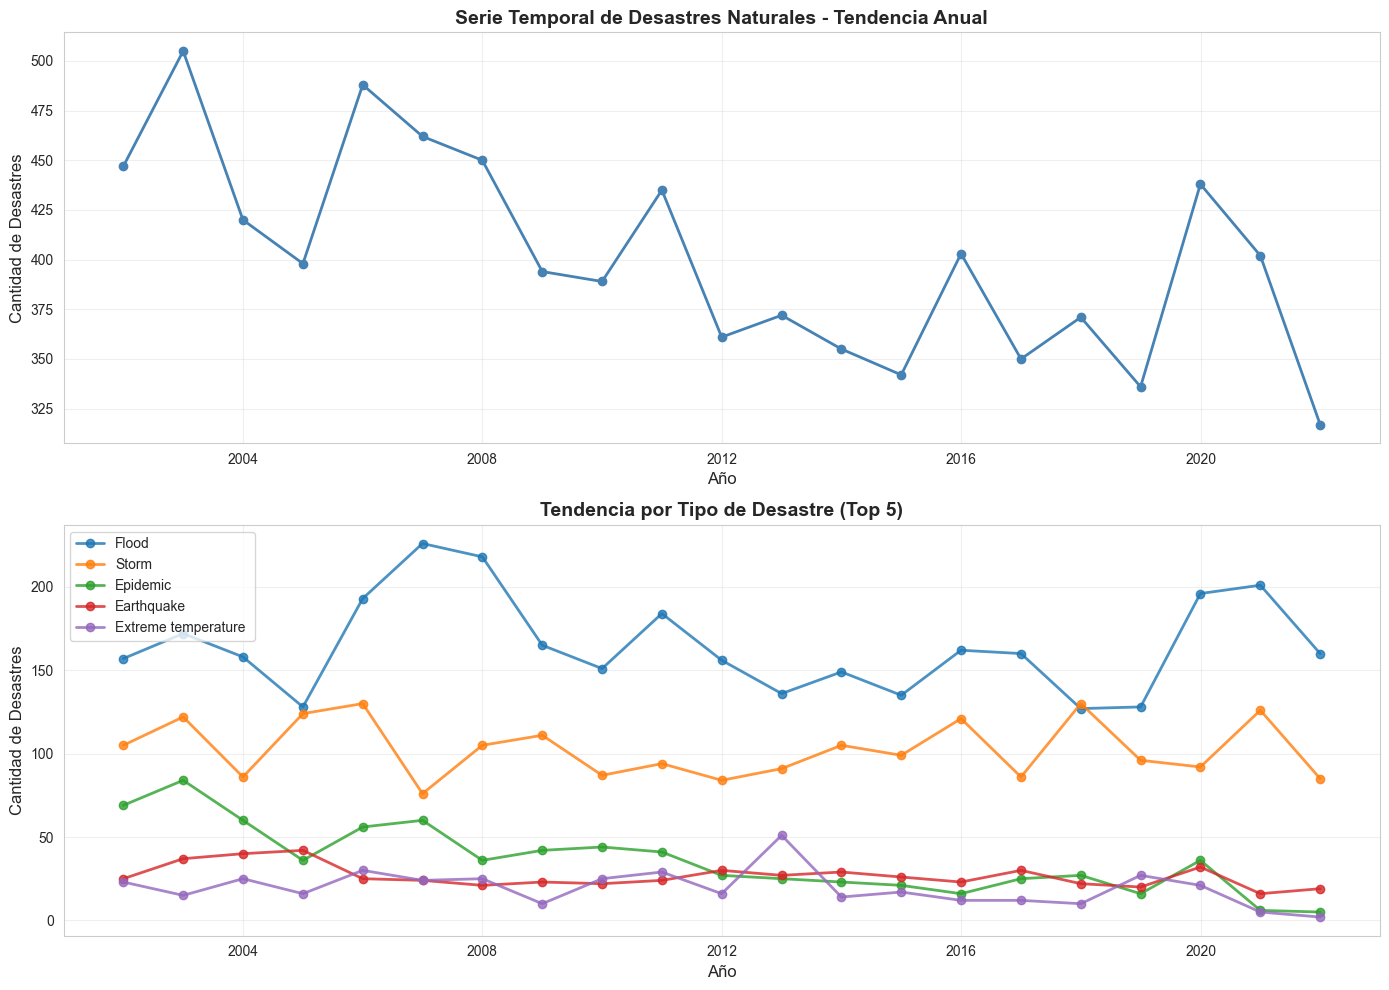

In [16]:
# Crear serie temporal
fig_serie = crear_serie_temporal(df_reciente)
plt.show()

### 5.2 Heatmap estacional

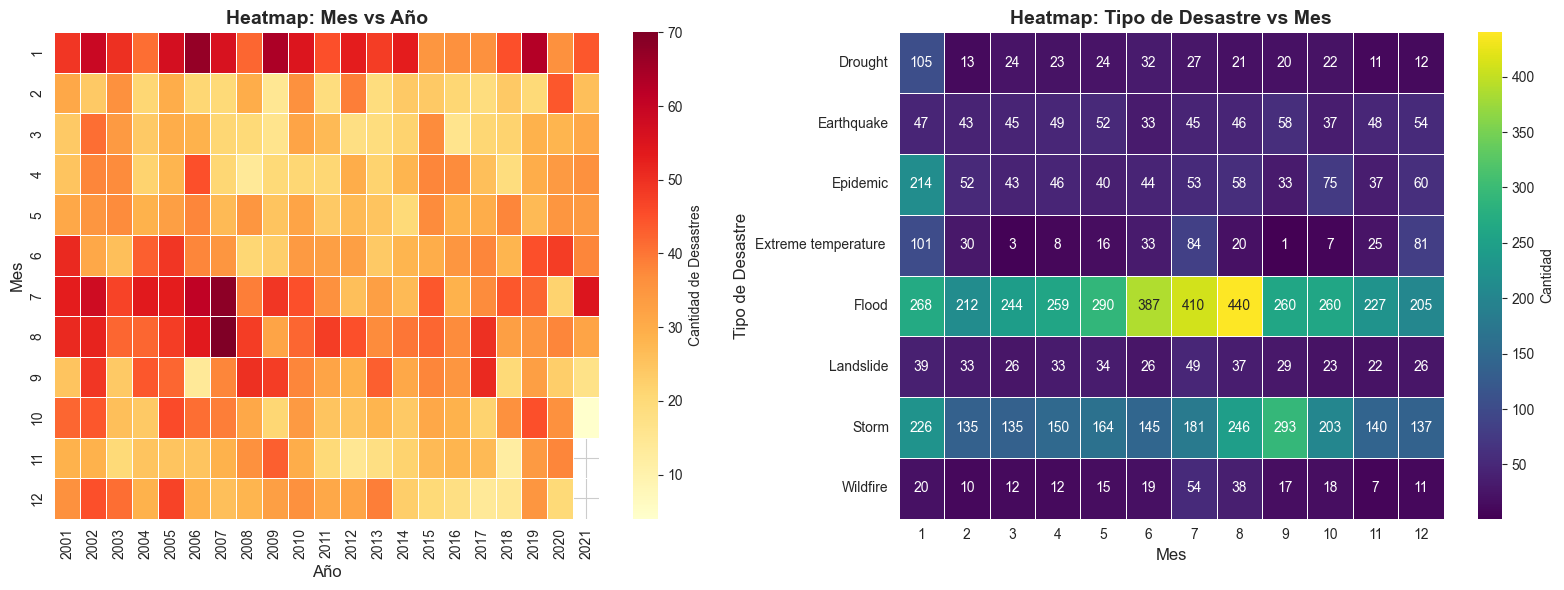

In [17]:
# Crear heatmap de patrones estacionales
fig_heatmap = crear_heatmap_estacional(df_reciente)
plt.show()

### 5.3 Distribución por tipo y continente

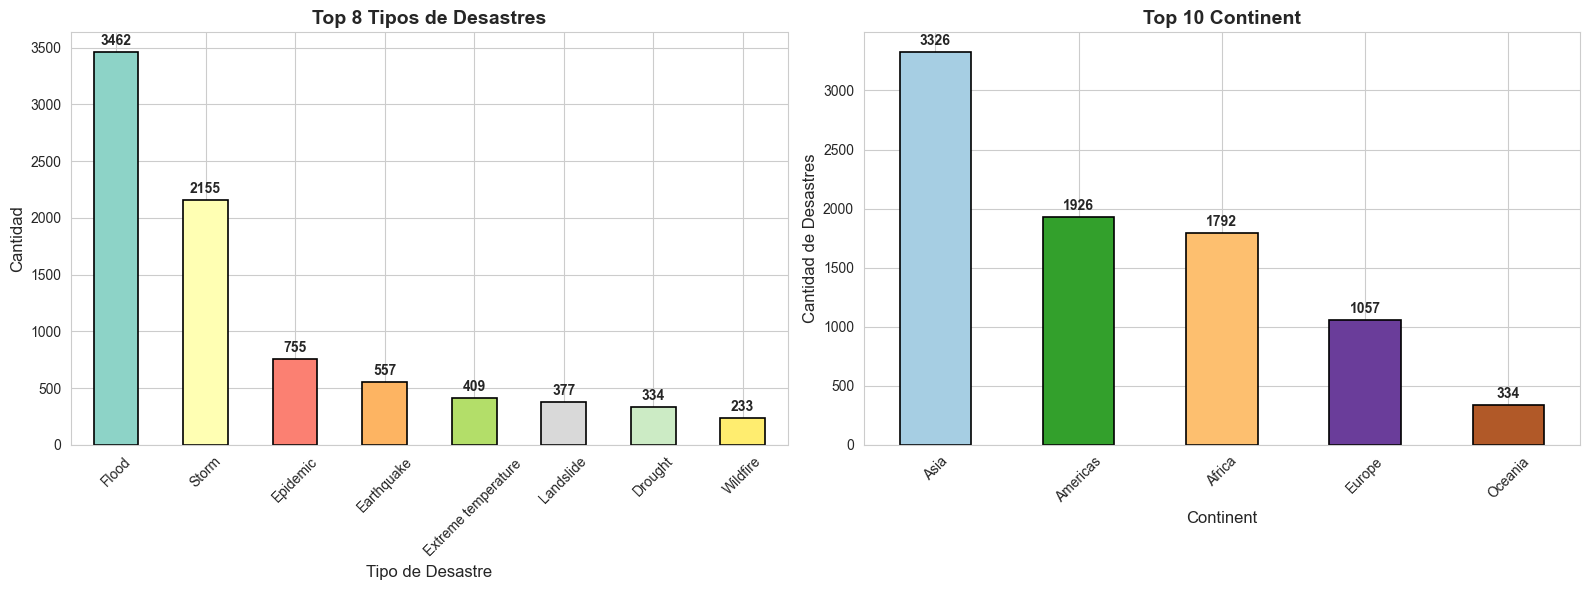

In [18]:
# Crear gráficos de barras por tipo y continente
fig_barras = crear_grafico_barras_tipo(df_reciente)
plt.show()

## 6. ANÁLISIS DE CRUCES DE VARIABLES

### 6.1 Cruce 1: Distribución geográfica de terremotos

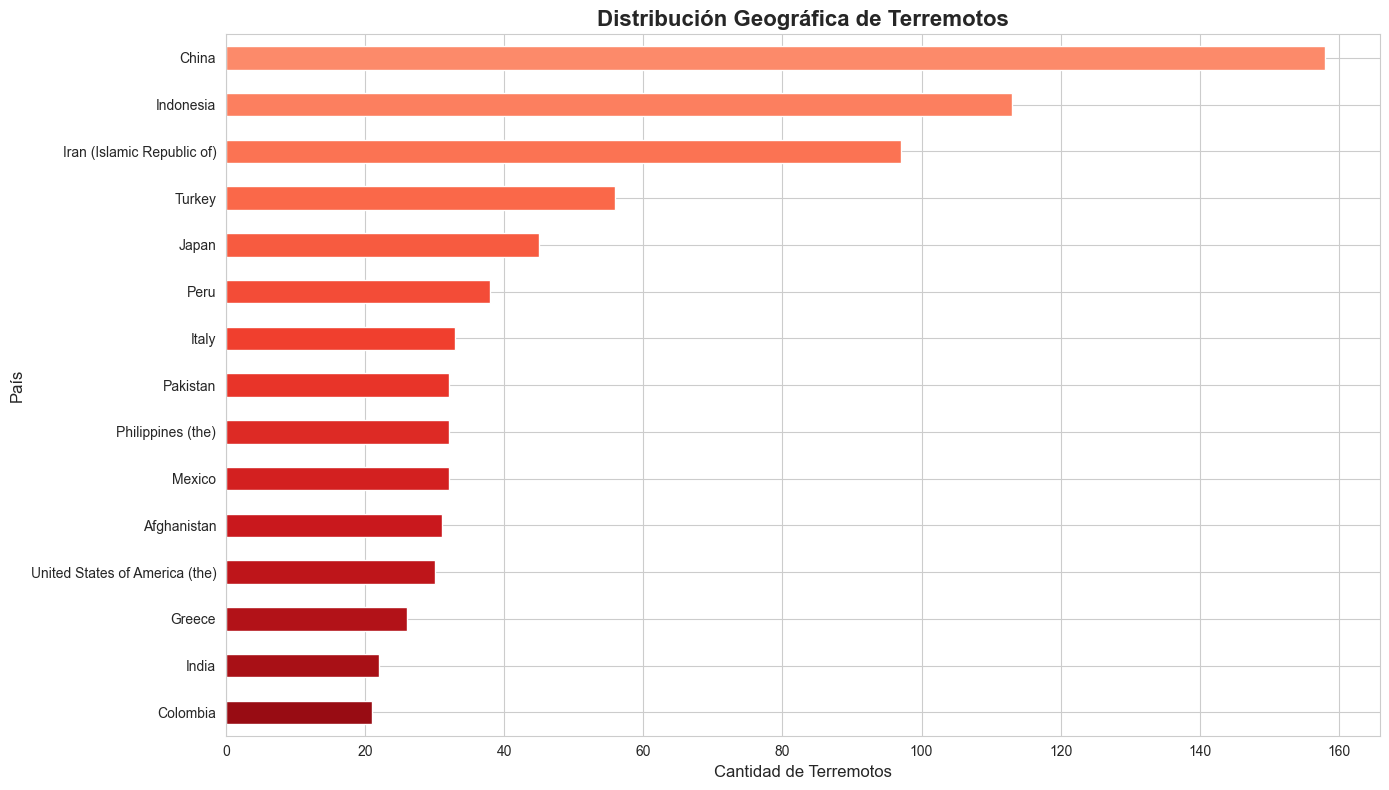

In [19]:
# Análisis de terremotos por región
fig_terremotos = crear_visualizacion_cruces(df, 'terremotos_geo')
plt.show()

#### Apreciación Crítica - Terremotos

**Observaciones:**
- Los países ubicados en el Cinturón de Fuego del Pacífico concentran la mayor cantidad de terremotos
- China, Indonesia, Japón e Irán aparecen consistentemente entre los países más afectados
- La distribución geográfica refleja claramente las zonas de actividad tectónica

**Análisis:**
- La concentración geográfica es predecible basada en la geología de placas tectónicas
- Los países identificados requieren inversión continua en construcción antisísmica
- Sistemas de alerta temprana son críticos en estas regiones

### 6.2 Cruce 2: Regiones con mayor incidencia de inundaciones

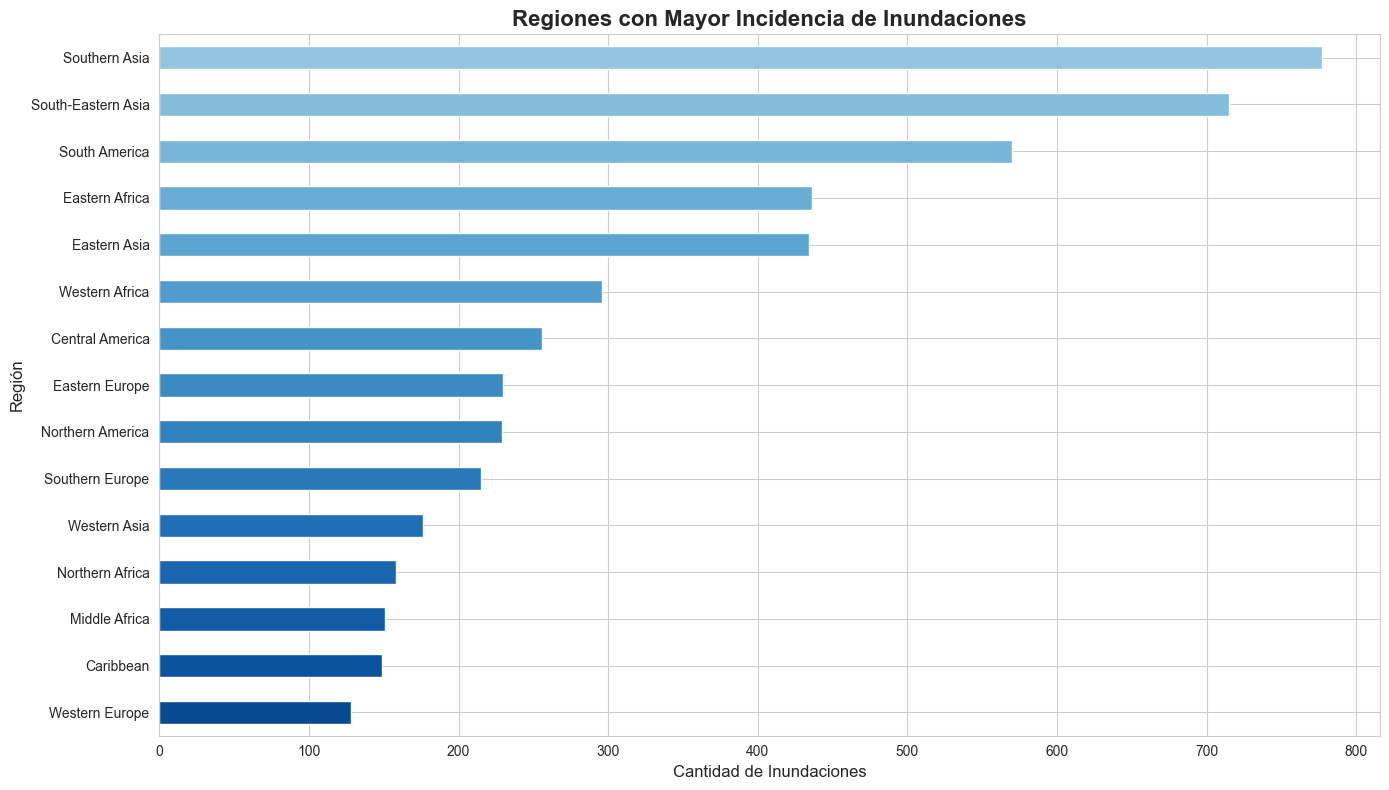

In [20]:
# Análisis de inundaciones por región
fig_inundaciones = crear_visualizacion_cruces(df, 'inundaciones_region')
plt.show()

In [21]:
# Análisis detallado de inundaciones
df_inundaciones = df[df['Disaster Type'].str.contains('Flood', case=False, na=False)]
print(f"\nTotal de inundaciones registradas: {len(df_inundaciones)}")
print(f"\nTop 10 regiones afectadas:")
print(df_inundaciones['Region'].value_counts().head(10))


Total de inundaciones registradas: 5272

Top 10 regiones afectadas:
Region
Southern Asia         777
South-Eastern Asia    715
South America         570
Eastern Africa        436
Eastern Asia          434
Western Africa        296
Central America       256
Eastern Europe        230
Northern America      229
Southern Europe       215
Name: count, dtype: int64


#### Apreciación Crítica - Inundaciones

**Observaciones:**
- Las inundaciones son uno de los desastres naturales más frecuentes a nivel global
- Asia destaca significativamente en frecuencia, especialmente el Sudeste Asiático y el Sur de Asia
- Regiones con grandes sistemas fluviales (Ganges, Mekong, Yangtze) son particularmente vulnerables

**Factores contribuyentes:**
- Monzones y lluvias estacionales intensas
- Alta densidad poblacional en llanuras aluviales
- Deforestación y cambios en el uso del suelo
- Infraestructura de drenaje insuficiente

**Implicancias:**
- Se requiere inversión en sistemas de drenaje y control de inundaciones
- La planificación urbana debe considerar zonas de inundación
- El cambio climático está intensificando los eventos de precipitación extrema

### 6.3 Cruce 3: Patrones regionales de sequías extremas

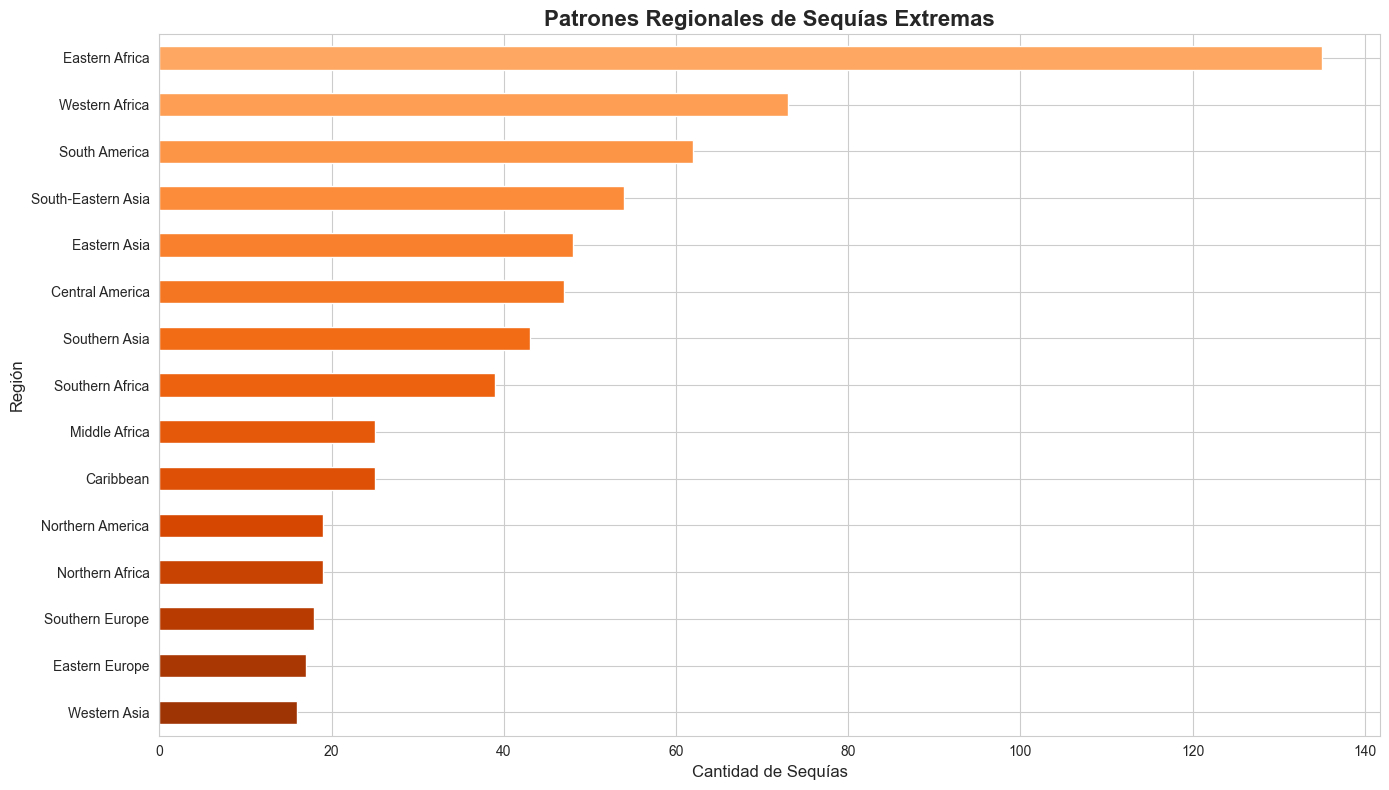

In [22]:
# Análisis de sequías por región
fig_sequias = crear_visualizacion_cruces(df, 'sequias_region')
plt.show()

In [23]:
# Análisis detallado de sequías
df_sequias = df[df['Disaster Type'].str.contains('Drought', case=False, na=False)]
print(f"\nTotal de sequías registradas: {len(df_sequias)}")
print(f"\nDistribución por continente:")
print(df_sequias['Continent'].value_counts())


Total de sequías registradas: 685

Distribución por continente:
Continent
Africa      291
Asia        166
Americas    153
Europe       44
Oceania      31
Name: count, dtype: int64


#### Apreciación Crítica - Sequías

**Observaciones:**
- Las sequías afectan principalmente a regiones de África y Asia
- África Oriental y el Sahel son particularmente vulnerables
- Las sequías tienden a tener impactos prolongados y afectar grandes poblaciones

**Características especiales:**
- Las sequías son eventos de desarrollo lento pero impacto masivo
- Afectan directamente la seguridad alimentaria y el acceso al agua
- Su impacto en población afectada suele ser mayor que su mortalidad directa

**Desafíos:**
- Predicción y monitoreo requieren sistemas de largo plazo
- Gestión de recursos hídricos es crítica
- Necesidad de estrategias de adaptación agrícola

### 6.4 Cruce 4: Frecuencia de tormentas por continente

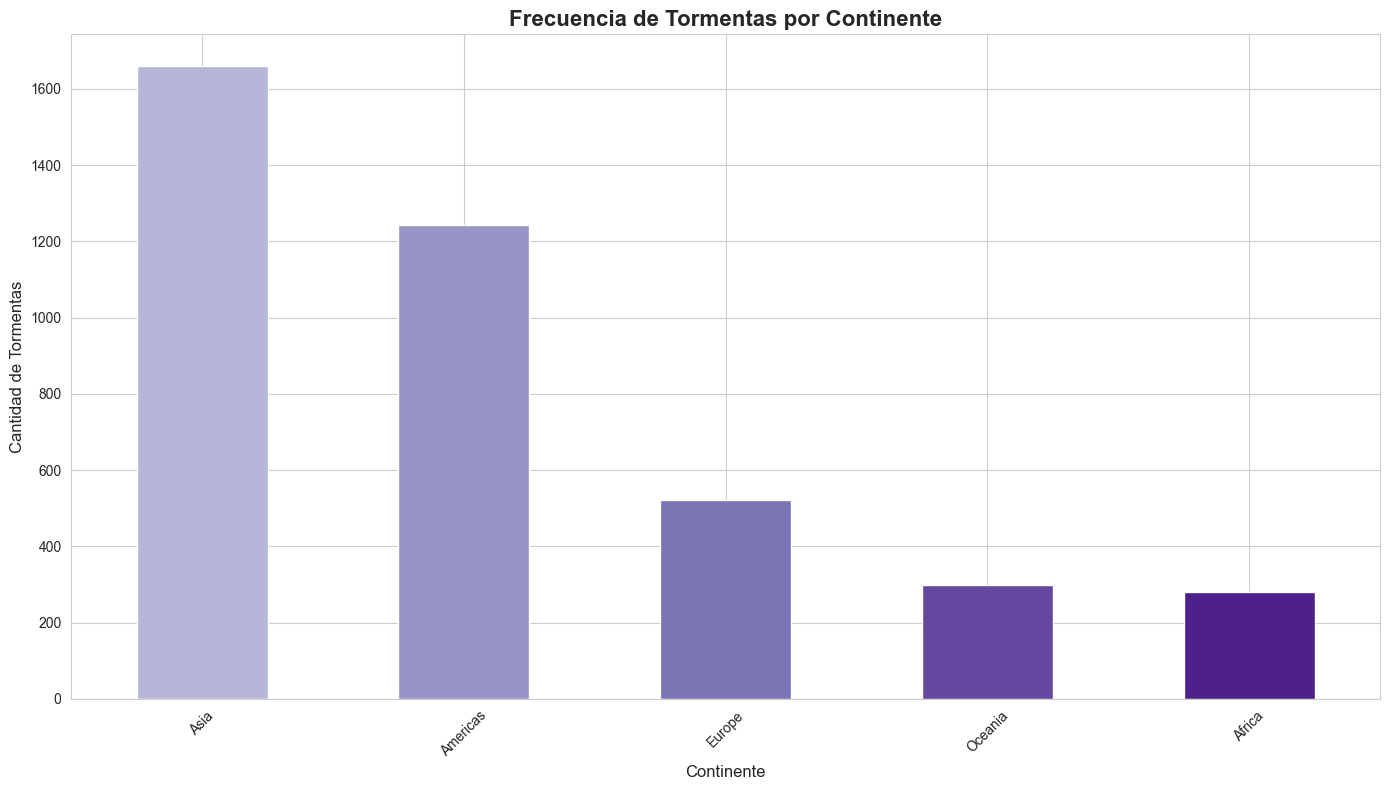

In [24]:
# Análisis de tormentas por continente
fig_tormentas = crear_visualizacion_cruces(df, 'tormentas_continente')
plt.show()

In [25]:
# Análisis detallado de tormentas
df_tormentas = df[df['Disaster Type'].str.contains('Storm', case=False, na=False)]
print(f"\nTotal de tormentas registradas: {len(df_tormentas)}")
print(f"\nDistribución por región:")
print(df_tormentas['Region'].value_counts().head(15))


Total de tormentas registradas: 4005

Distribución por región:
Region
Eastern Asia                 649
Northern America             634
South-Eastern Asia           550
Southern Asia                395
Caribbean                    299
Western Europe               240
Central America              224
Eastern Africa               164
Australia and New Zealand    124
Northern Europe               98
Melanesia                     97
Eastern Europe                92
Southern Europe               87
South America                 87
Western Asia                  61
Name: count, dtype: int64


#### Apreciación Crítica - Tormentas

**Observaciones:**
- Asia y las Américas concentran la mayor cantidad de tormentas registradas
- Las tormentas tropicales (huracanes, tifones, ciclones) son las más devastadoras
- El Caribe, el Sudeste Asiático y el Este de Asia son especialmente vulnerables

**Patrones identificados:**
- Estacionalidad marcada según la región (temporada de huracanes)
- Incremento en intensidad relacionado con temperaturas oceánicas
- Áreas costeras concentran mayor impacto

**Consideraciones:**
- Los sistemas de alerta han mejorado significativamente la reducción de mortalidad
- Sin embargo, los daños económicos continúan incrementando
- La infraestructura costera requiere diseño resiliente

### 6.5 Cruce 5: Tendencia histórica de incendios forestales

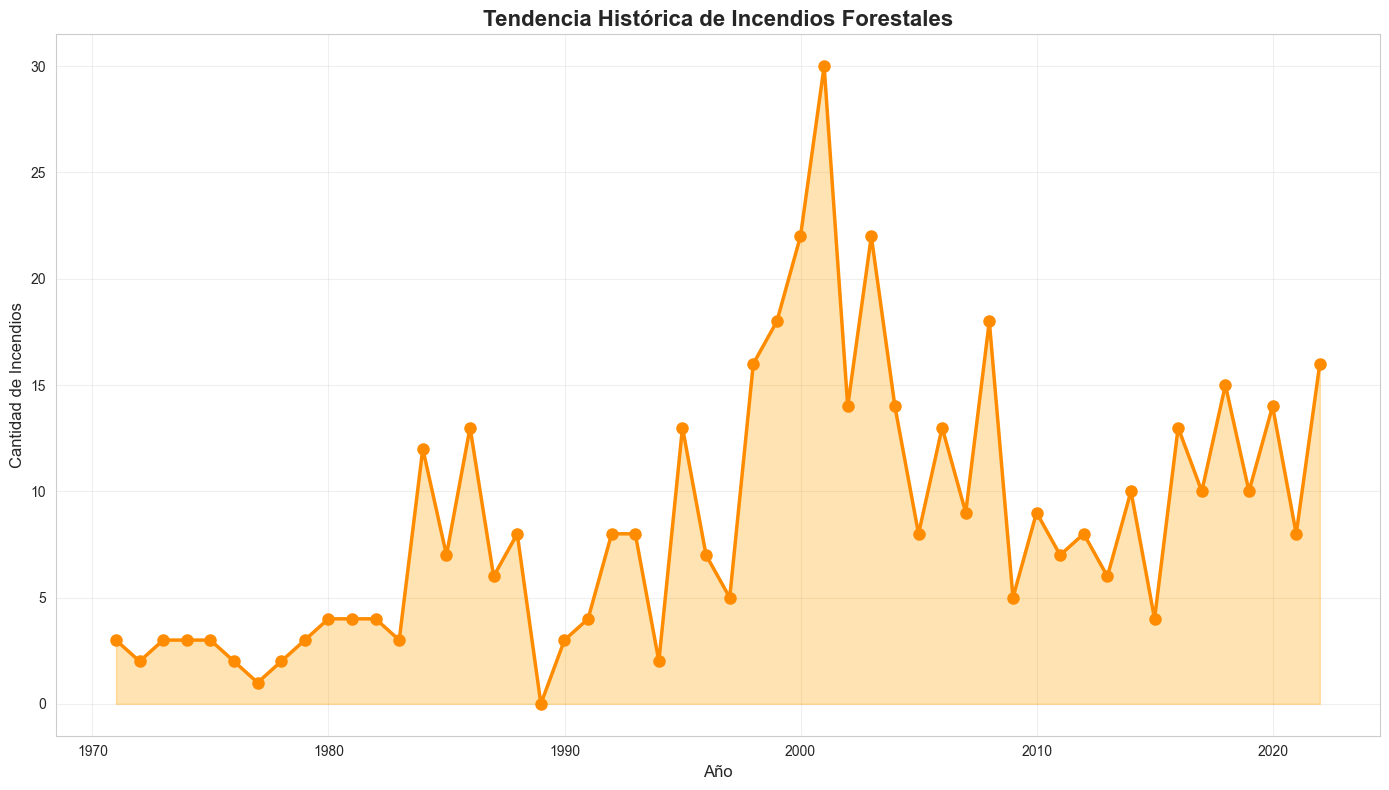

In [26]:
# Análisis de tendencia de incendios forestales
fig_incendios = crear_visualizacion_cruces(df, 'incendios_tendencia')
plt.show()

In [27]:
# Análisis detallado de incendios
df_incendios = df[df['Disaster Type'].str.contains('Wildfire', case=False, na=False)]
print(f"\nTotal de incendios forestales registrados: {len(df_incendios)}")
print(f"\nTop 10 países afectados:")
print(df_incendios['Country'].value_counts().head(10))

# Tendencia por década
if len(df_incendios) > 0:
    print(f"\nDistribución por década:")
    print(df_incendios['decada'].value_counts().sort_index())


Total de incendios forestales registrados: 452

Top 10 países afectados:
Country
United States of America (the)    87
Australia                         38
Hong Kong                         27
Russian Federation (the)          25
Canada                            23
Spain                             17
Greece                            15
Portugal                          13
Chile                             13
France                            12
Name: count, dtype: int64

Distribución por década:
decada
1970     26
1980     60
1990    103
2000    142
2010     97
2020     24
Name: count, dtype: int64


#### Apreciación Crítica - Incendios Forestales

**Observaciones:**
- Los incendios forestales muestran una tendencia creciente en las últimas décadas
- Se observa un incremento particularmente marcado en los años 2000-2020
- Países como Australia, Estados Unidos, y regiones mediterráneas son especialmente afectados

**Factores contribuyentes:**
- Incremento de temperaturas y sequías prolongadas (cambio climático)
- Expansión urbana hacia zonas forestales (interfaz urbano-forestal)
- Acumulación de combustible vegetal por supresión histórica de incendios
- Actividad humana (negligencia, intencionalidad)

**Implicancias futuras:**
- Se espera que la tendencia continúe incrementando con el calentamiento global
- Mayor necesidad de gestión preventiva de combustibles
- Importancia creciente de sistemas de detección temprana y respuesta rápida
- Impacto significativo en biodiversidad, calidad del aire y emisiones de CO2

## 7. ANÁLISIS COMPARATIVO DETALLADO

### Análisis en profundidad de los tipos de desastres más frecuentes

In [28]:
# Obtener los 3 tipos más frecuentes
top_3_tipos = df_reciente['Disaster Type'].value_counts().head(3).index.tolist()
print(f"Top 3 tipos de desastres (2001-2021):")
for i, tipo in enumerate(top_3_tipos, 1):
    print(f"{i}. {tipo}: {df_reciente[df_reciente['Disaster Type'] == tipo].shape[0]} eventos")

Top 3 tipos de desastres (2001-2021):
1. Flood: 3462 eventos
2. Storm: 2155 eventos
3. Epidemic: 755 eventos


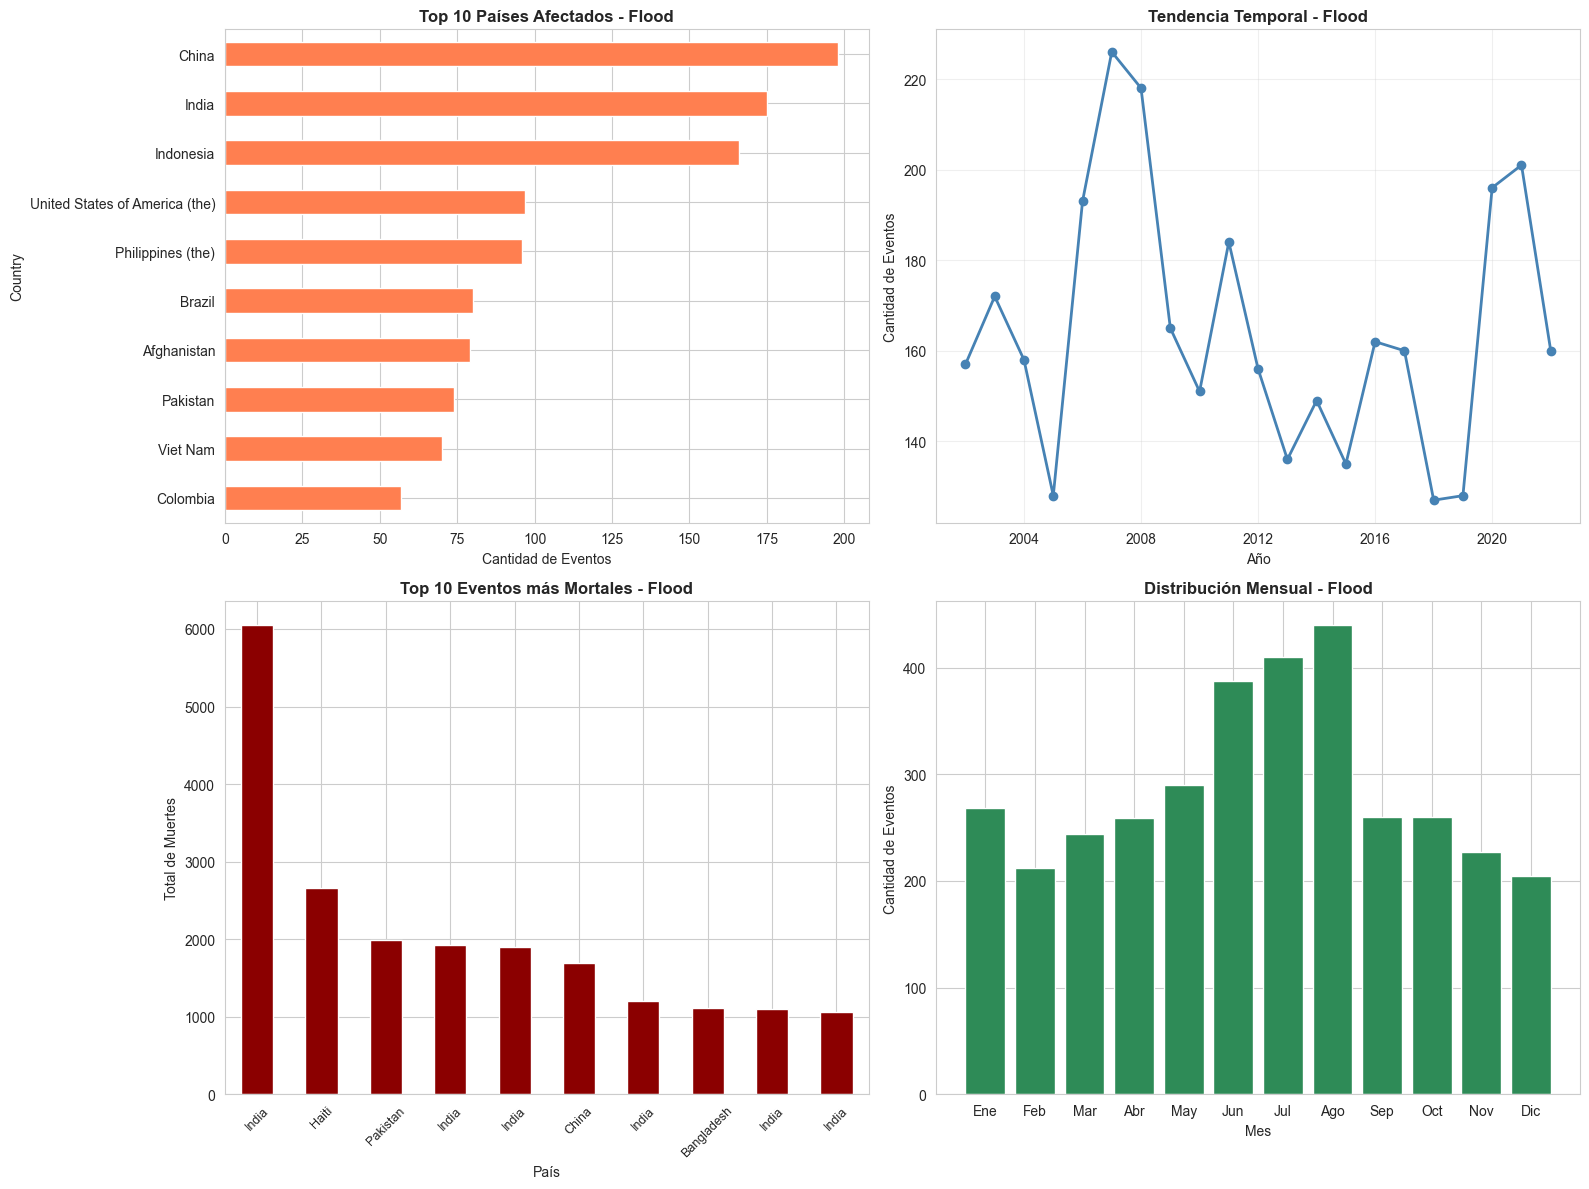

In [29]:
# Análisis comparativo del primer tipo más frecuente
if len(top_3_tipos) > 0:
    fig_comp1 = crear_analisis_comparativo(df_reciente, top_3_tipos[0])
    plt.show()

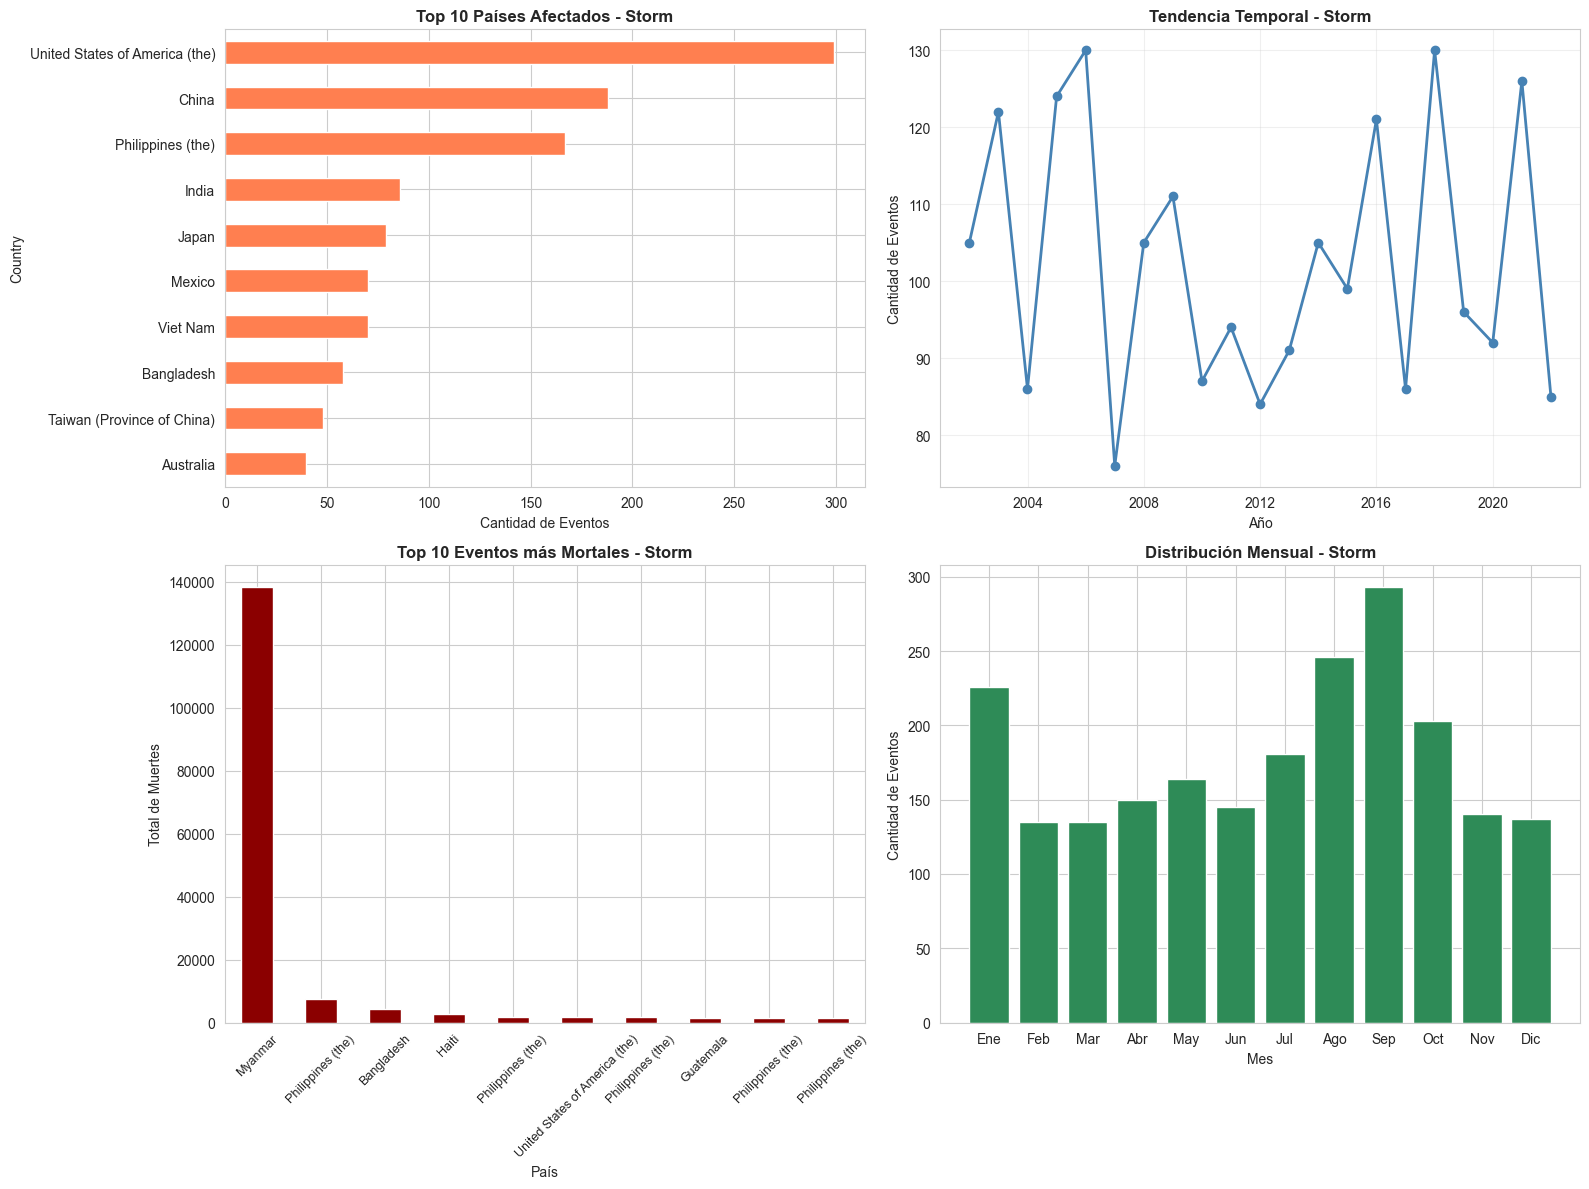

In [30]:
# Análisis comparativo del segundo tipo más frecuente
if len(top_3_tipos) > 1:
    fig_comp2 = crear_analisis_comparativo(df_reciente, top_3_tipos[1])
    plt.show()

## 8. RESUMEN EJECUTIVO Y CONCLUSIONES

### Hallazgos Principales

**1. Tendencias Temporales:**
- Se observa un incremento en la frecuencia de desastres naturales registrados en las últimas dos décadas
- Este incremento es particularmente notable en eventos relacionados con el clima (inundaciones, tormentas, sequías)
- Los incendios forestales muestran la tendencia creciente más preocupante

**2. Patrones Estacionales:**
- Existe una clara estacionalidad en la ocurrencia de desastres
- Ciertos meses concentran mayor actividad, permitiendo anticipación y preparación
- Diferentes tipos de desastres tienen patrones estacionales diferenciados

**3. Distribución Geográfica:**
- Asia concentra la mayor cantidad y variedad de desastres naturales
- Los países en desarrollo suelen tener mayor población afectada debido a menor capacidad de respuesta
- Existe una clara correlación entre ubicación geográfica y tipos específicos de desastres

**4. Tipos de Desastres:**
- Las inundaciones son el tipo más frecuente a nivel global
- Los terremotos, aunque menos frecuentes, tienen impacto devastador inmediato
- Las sequías afectan a más personas pero con impacto distribuido en el tiempo

### Recomendaciones

**Política Pública:**
- Fortalecer sistemas de alerta temprana, especialmente en regiones identificadas de alto riesgo
- Invertir en infraestructura resiliente según el perfil de riesgo de cada región
- Desarrollar planes de preparación estacional basados en patrones identificados

**Investigación:**
- Profundizar en la relación entre cambio climático y aumento de eventos extremos
- Estudiar la efectividad de diferentes estrategias de mitigación
- Mejorar modelos predictivos incorporando análisis temporal y geográfico

**Cooperación Internacional:**
- Compartir mejores prácticas entre países con perfiles de riesgo similares
- Establecer mecanismos de respuesta rápida regional
- Apoyar a países en desarrollo en el fortalecimiento de capacidades

### Limitaciones del Estudio

- Los datos dependen de la capacidad de registro de cada país
- Puede existir sesgo hacia eventos reportados en países desarrollados
- Algunos eventos pequeños o en áreas remotas pueden estar subrepresentados
- La clasificación de tipos de desastres puede variar según la fuente

## 9. ESTADÍSTICAS FINALES

In [31]:
# Estadísticas generales del dataset procesado
print("=" * 60)
print("ESTADÍSTICAS FINALES DEL ANÁLISIS")
print("=" * 60)

print(f"\nPERÍODO COMPLETO (1970-2021):")
print(f"  Total de eventos: {len(df):,}")
print(f"  Países afectados: {df['Country'].nunique()}")
print(f"  Regiones afectadas: {df['Region'].nunique()}")
print(f"  Tipos de desastres: {df['Disaster Type'].nunique()}")

print(f"\nÚLTIMAS DOS DÉCADAS (2001-2021):")
print(f"  Total de eventos: {len(df_reciente):,}")
print(f"  Promedio anual: {len(df_reciente)/20:.1f} eventos/año")

if 'Total Deaths' in df.columns:
    muertes_totales = df['Total Deaths'].sum()
    print(f"\nIMPACTO HUMANO (período completo):")
    print(f"  Total de muertes registradas: {muertes_totales:,.0f}")

if 'Total Affected' in df.columns:
    afectados_totales = df['Total Affected'].sum()
    print(f"  Total de personas afectadas: {afectados_totales:,.0f}")

print("\n" + "=" * 60)
print("Análisis completado exitosamente")
print("=" * 60)

ESTADÍSTICAS FINALES DEL ANÁLISIS

PERÍODO COMPLETO (1970-2021):
  Total de eventos: 14,644
  Países afectados: 228
  Regiones afectadas: 23
  Tipos de desastres: 14

ÚLTIMAS DOS DÉCADAS (2001-2021):
  Total de eventos: 8,435
  Promedio anual: 421.8 eventos/año

IMPACTO HUMANO (período completo):
  Total de muertes registradas: 3,690,132
  Total de personas afectadas: 8,034,968,791

Análisis completado exitosamente
